In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Устанавливаем библиотеку Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Создаём каталог с именем “.kaggle”:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Копируем файл “kaggle.json” в созданный каталог:
! cp kaggle.json ~/.kaggle/

In [ ]:
# Назнаем необходимое разрешение для этого файла:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Загрузка набора данных:
! kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Извлекаем данные:
! unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
train_df = train_df.drop(columns=['Id'], axis=1) # 'Id' ни на что не влияет.
test_df = test_df.drop(columns=['Id'], axis=1)

In [ ]:
train_df.shape

(1460, 80)

In [ ]:
test_df.shape

(1459, 79)

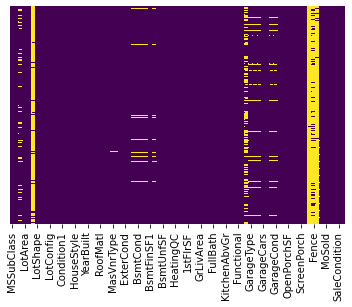

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Смотрим нулевые значения с помощью тепловой карты.

In [ ]:
train_df['SalePrice'].describe() # Смотрим таргет.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


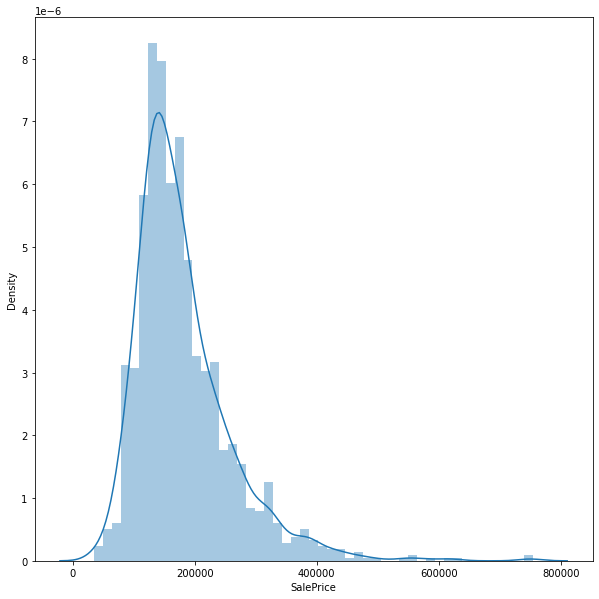

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_df['SalePrice']) # Есть отклонение.

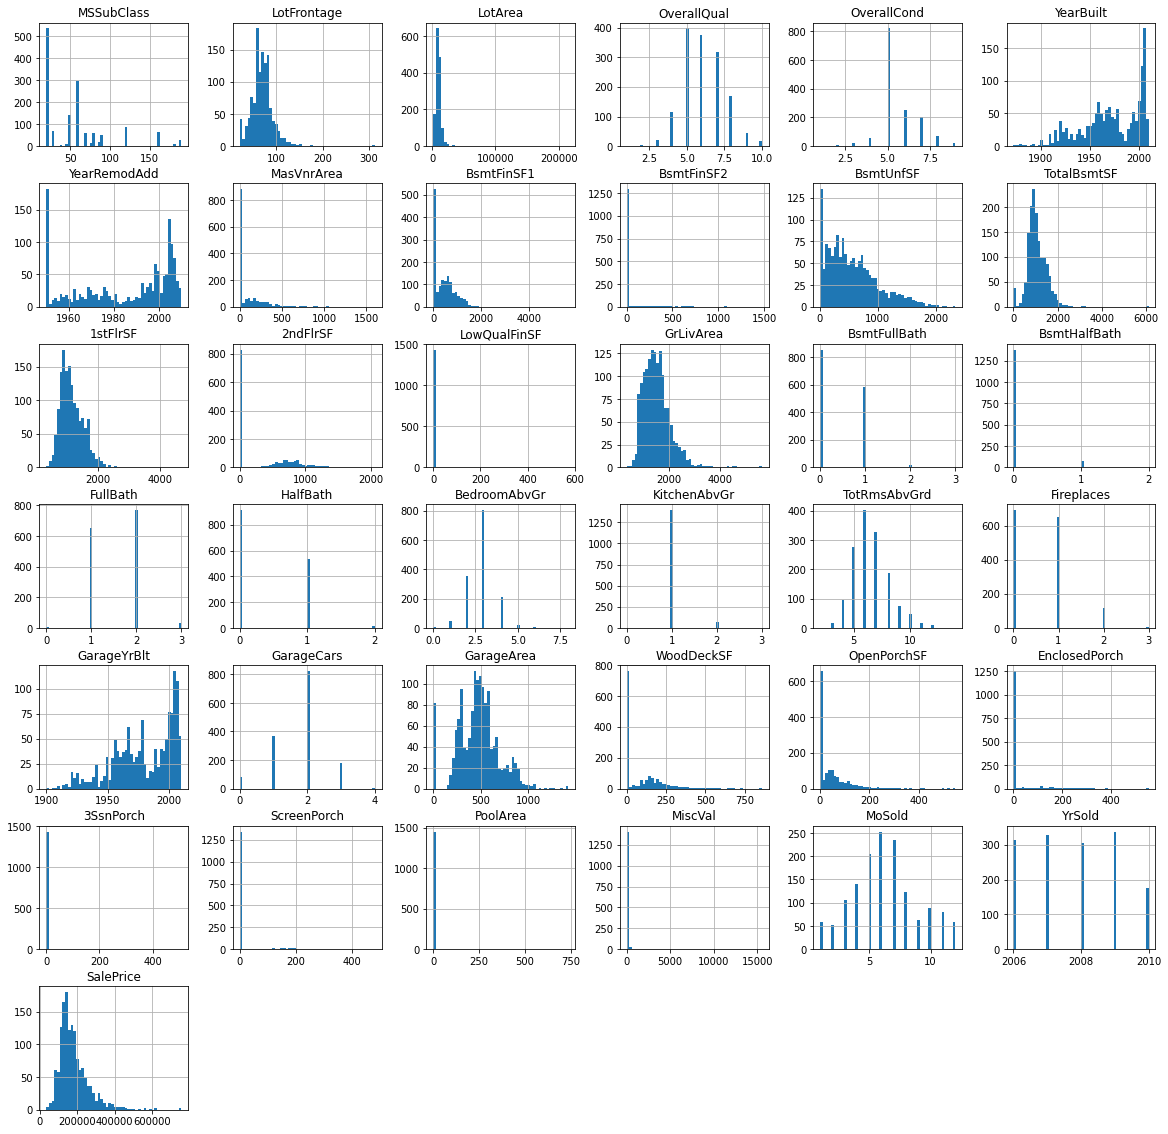

In [ ]:
train_df.hist(bins=50,figsize=(20,20))
plt.show()

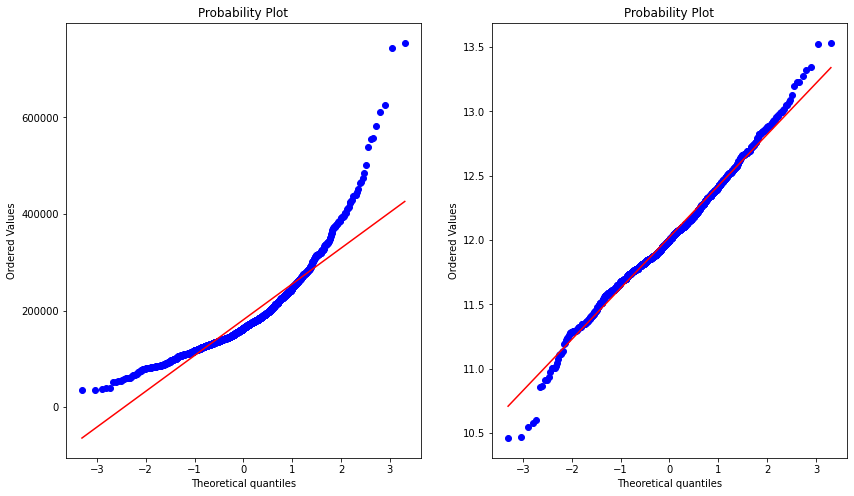

In [ ]:
from scipy import stats
fig = plt.figure(figsize = (14,8))
fig.add_subplot(1,2,1) # Распределение на необработанных данных
res = stats.probplot(train_df['SalePrice'], plot=plt)
fig.add_subplot(1,2,2) # Распределение при условии, что мы прологарифмировали 'SalePrice'
res = stats.probplot(np.log1p(train_df['SalePrice']), plot=plt)

In [ ]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice']) # Нормализуем дистрибутивы.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


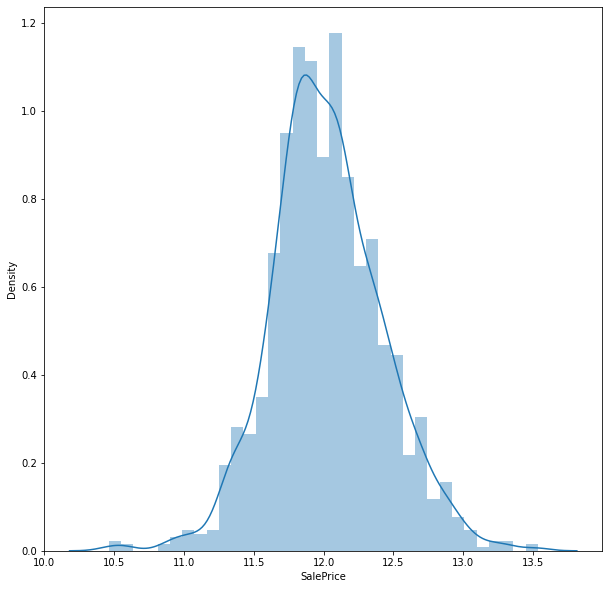

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_df['SalePrice'])

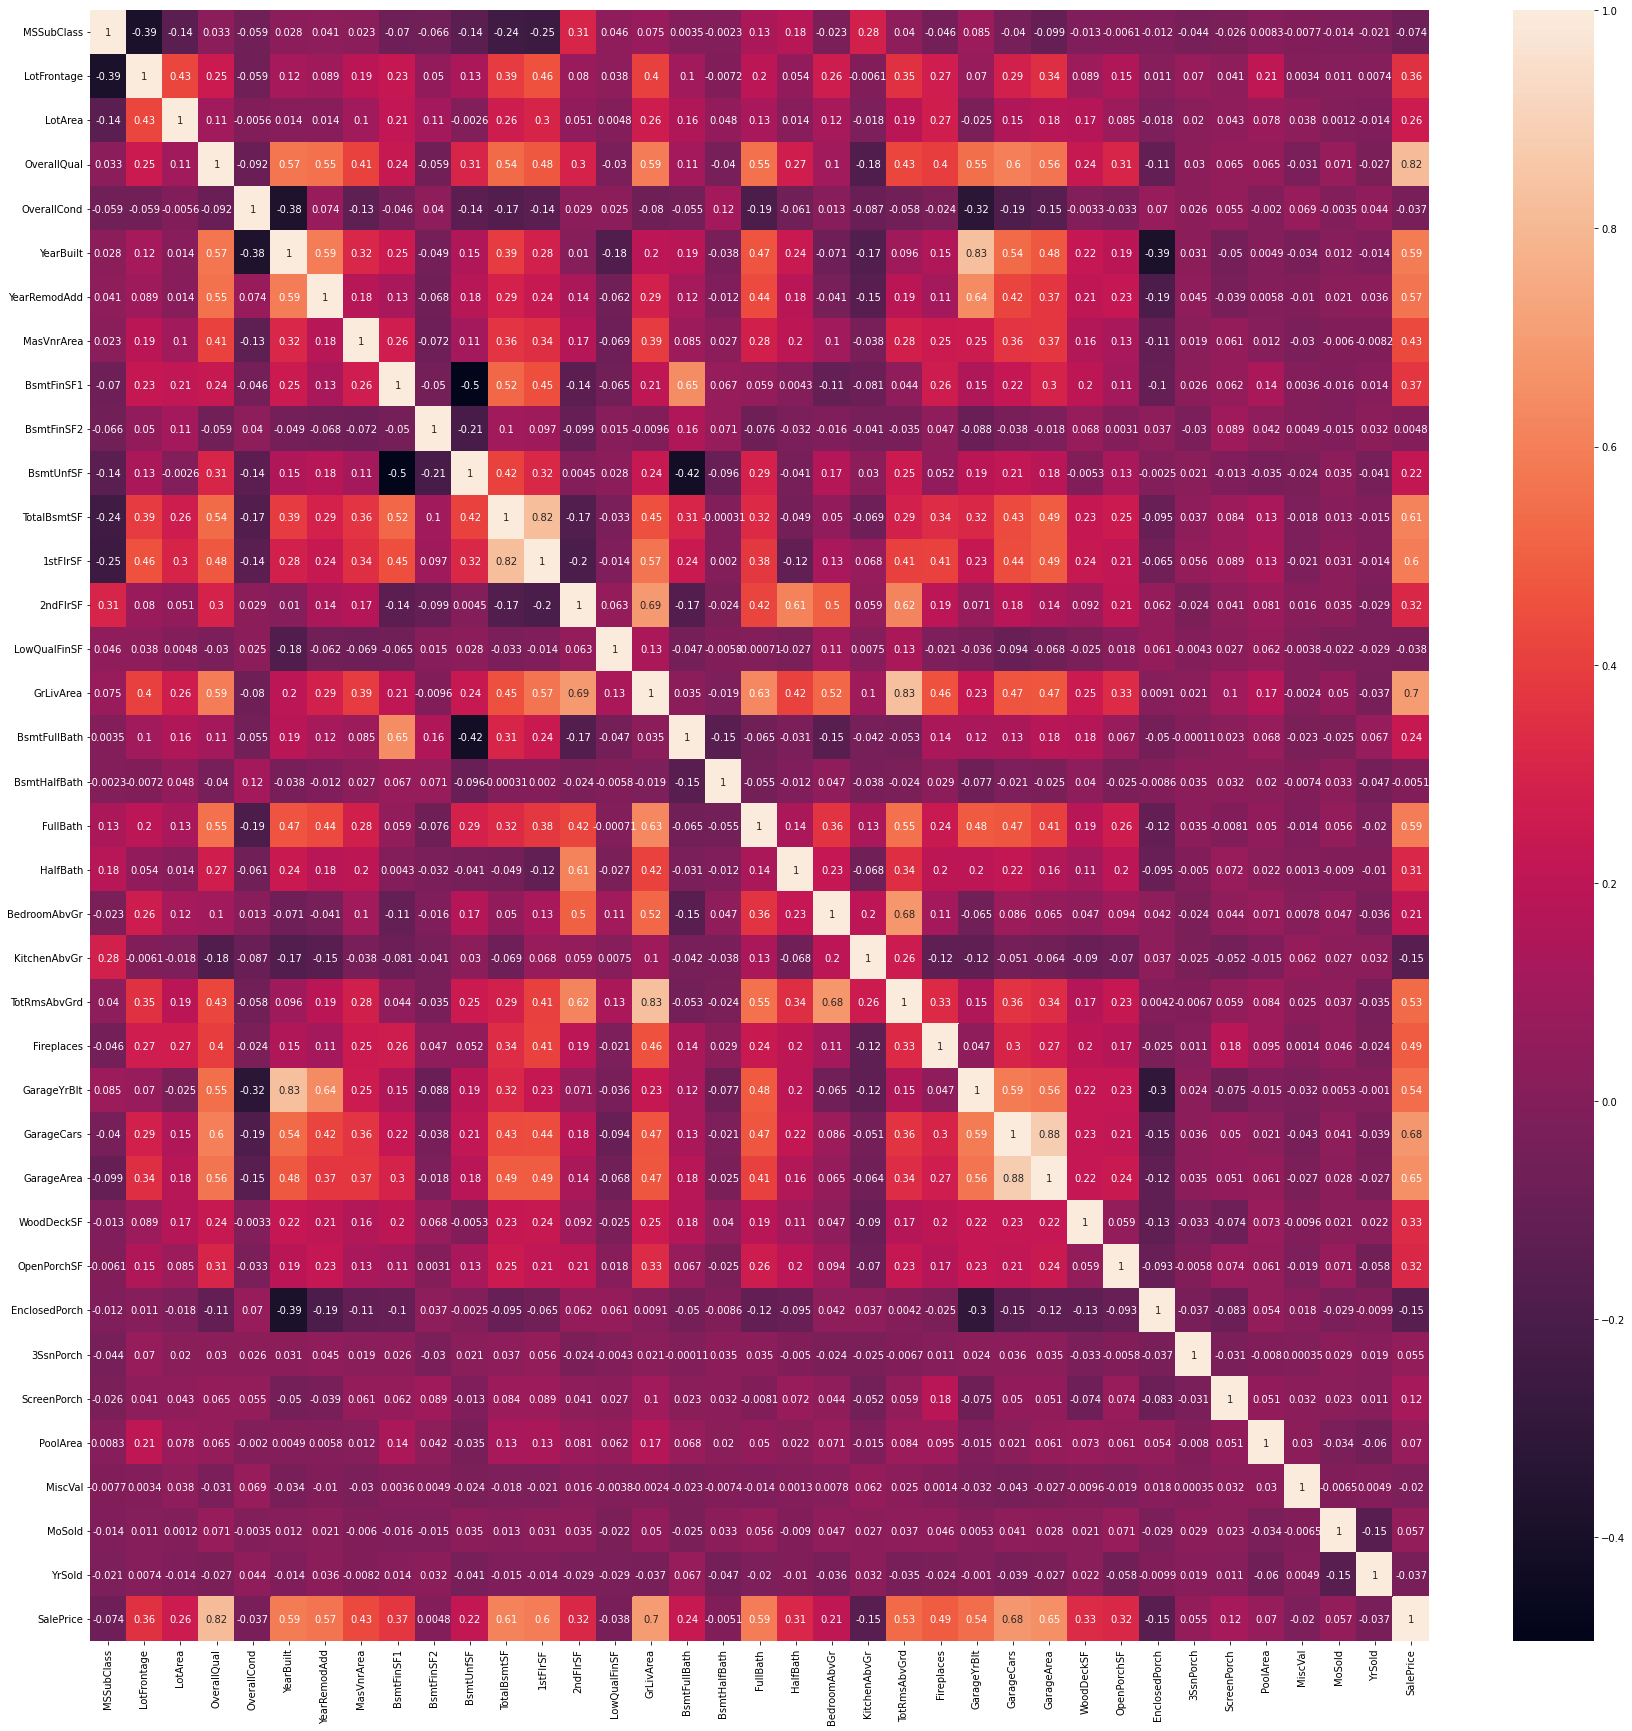

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(), annot=True, annot_kws={'size':10})
plt.show()

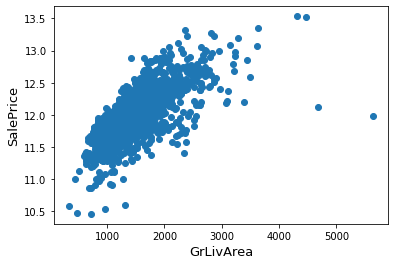

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

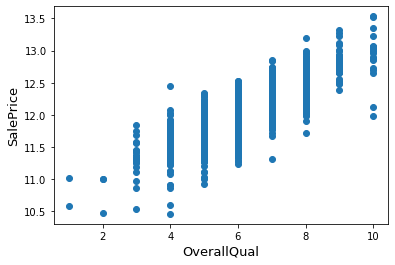

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['OverallQual'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

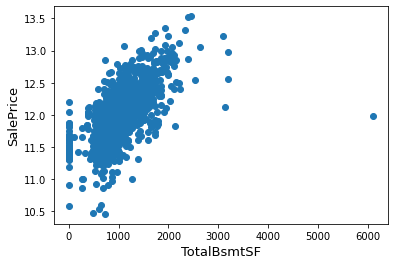

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['TotalBsmtSF'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

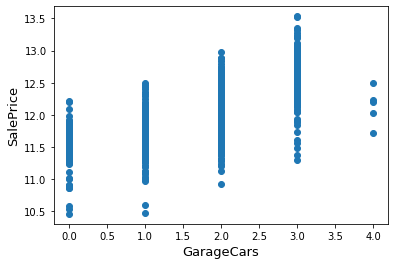

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageCars'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

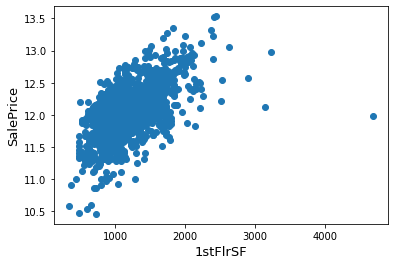

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['1stFlrSF'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

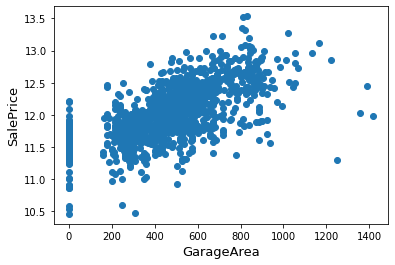

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

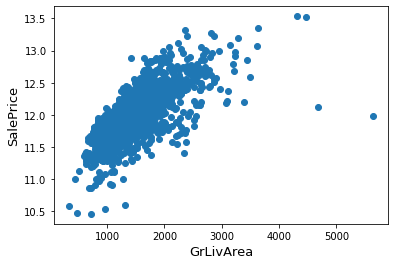

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

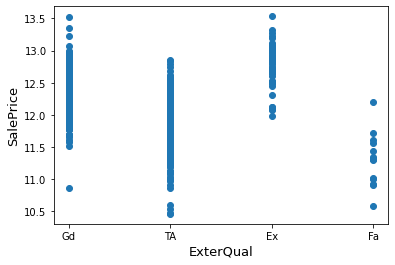

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['ExterQual'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('ExterQual', fontsize=13)
plt.show()

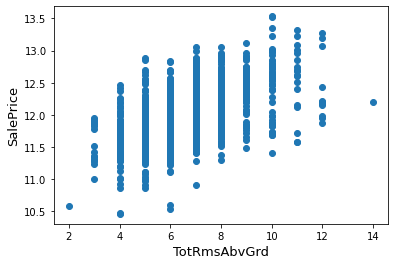

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['TotRmsAbvGrd'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotRmsAbvGrd', fontsize=13)
plt.show()

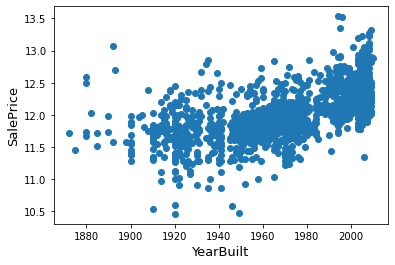

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['YearBuilt'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

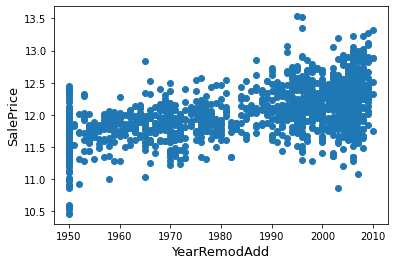

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['YearRemodAdd'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearRemodAdd', fontsize=13)
plt.show()

In [ ]:
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 3000) & (train_df['SalePrice'] > 100000)].index)
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 2000) & (train_df['SalePrice'] > 500000)].index)
train_df = train_df.drop(train_df[(train_df['OverallQual'] < 3) & (train_df['SalePrice'] < 550000)].index)
train_df = train_df.drop(train_df[(train_df['OverallQual'] > 9) & (train_df['SalePrice'] < 500000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF'] > 2000) & (train_df['SalePrice'] > 100000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF'] < 1) & (train_df['SalePrice'] > 0)].index)
train_df = train_df.drop(train_df[(train_df['GarageCars'] > 3) & (train_df['SalePrice'] > 100000)].index)
train_df = train_df.drop(train_df[(train_df['1stFlrSF'] > 2500) & (train_df['SalePrice'] > 100000)].index)
train_df = train_df.drop(train_df[(train_df['GarageArea'] > 1000) & (train_df['SalePrice'] > 0)].index)
train_df = train_df.drop(train_df[(train_df['GarageArea'] < 1) & (train_df['SalePrice'] > 0)].index)

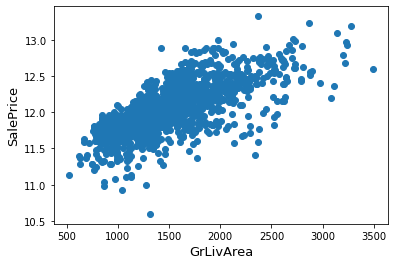

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

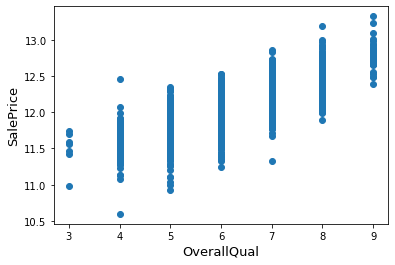

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['OverallQual'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

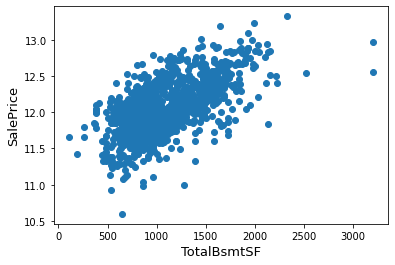

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['TotalBsmtSF'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

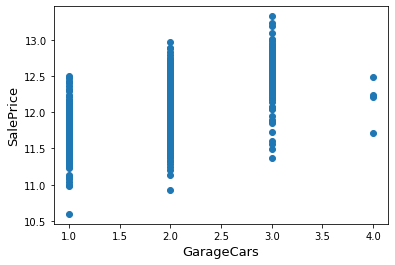

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageCars'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

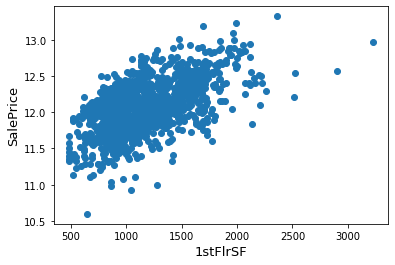

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['1stFlrSF'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

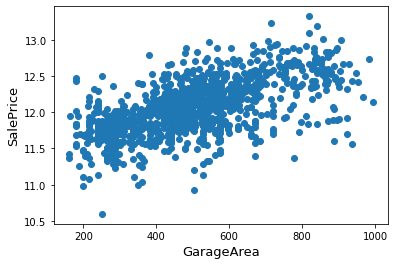

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

In [ ]:
train_df.isnull().sum().sort_values(ascending=False).head(20) # Пропущенные значения

PoolQC          1311
MiscFeature     1268
Alley           1234
Fence           1058
FireplaceQu      593
LotFrontage      242
MasVnrArea         7
MasVnrType         7
Electrical         1
BsmtFinType2       1
BsmtExposure       1
TotRmsAbvGrd       0
GarageYrBlt        0
GarageType         0
Fireplaces         0
Functional         0
MSSubClass         0
KitchenQual        0
KitchenAbvGr       0
HalfBath           0
dtype: int64

Text(0.5, 1.0, 'Общее количество пустых значений ')

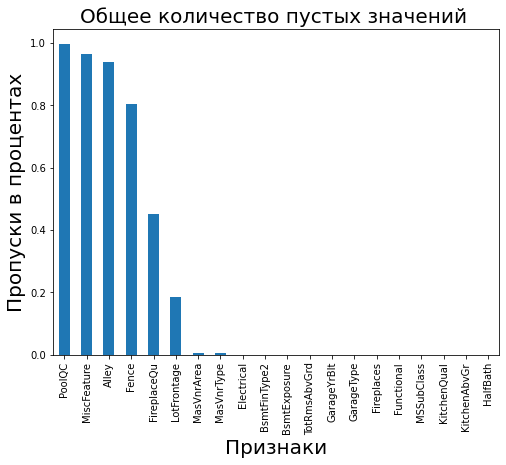

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Признаки", fontsize = 20)
plt.ylabel("Пропуски в процентах", fontsize = 20)
plt.title("Общее количество пустых значений ", fontsize = 20)

In [ ]:
Target = 'SalePrice'
train_df.dropna(axis=0, subset=[Target], inplace=True)

In [ ]:
def missing(df): # Разбираемся с пропущенными данными.
    num = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']] # Числа отбираем по формату int64 и float64.
    cat = [cname for cname in df.columns if df[cname].dtype == "object"] # Категориальные значения отбираем по формату object.
    values = {}
    for a in num:
        values[a] = df[a].mean()
    for a in cat:
        values[a] = 'Not'

    df.fillna(value=values, inplace=True)
    
missing(train_df)
missing(test_df)

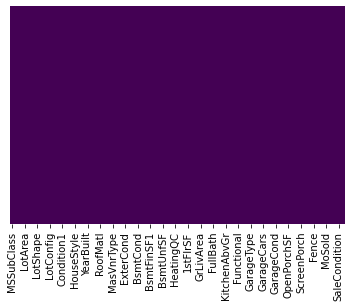

In [ ]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [ ]:
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [ ]:
train_df = train_df.replace({'NONE':0,'NO':0,'No':0,'nan':0,'Not':0,
                   'RH':1, 'RL':2, 'RM':3, 'FV':4, 'C (all)':5, 
                   'Pave':1, 'Grvl':2,
                   'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4,
                   'Lvl':1, 'HLS':2, 'Bnk':3, 'Low':4,
                   'AllPub':1, 'NoSeWa':2,
                   'Inside':1, 'Corner':2, 'FR2':3, 'CulDSac':4, 'FR3':5,
                   'Gtl':1, 'Mod':2, 'Sev':3,
                   'NAmes':1, 'Gilbert':2, 'StoneBr':3, 'BrDale':4, 'NPkVill':5, 'NridgHt':6,'Blmngtn':7, 'NoRidge':8,
                   'Somerst':9, 'SawyerW':10, 'Sawyer':11, 'NWAmes':12, 'OldTown':13, 'BrkSide':14, 'ClearCr':15,
                   'SWISU':16, 'Edwards':17, 'CollgCr':18, 'Crawfor':19, 'Blueste':20, 'IDOTRR':21, 'Mitchel':22,
                   'Timber':23, 'MeadowV':24,'Veenker':25,
                   'Feedr':1, 'Norm':2, 'PosN':3, 'RRNe':4, 'Artery':5, 'RRNn':6, 'PosA':7, 'RRAn':8, 'RRAe':9,
                   '1Fam':1, 'TwnhsE':2, 'Twnhs':3, 'Duplex':4, '2fmCon':5,
                   '1Story':1, '2Story':2, 'SLvl':3, '1.5Fin':4, 'SFoyer':5, '2.5Unf':6, '1.5Unf':7,'2.5Fin':8,
                   'Gable':1, 'Hip':2, 'Gambrel':3, 'Flat':4, 'Mansard':5, 'Shed':6,
                   'CompShg':1, 'Tar&Grv':2, 'WdShake':3, 'WdShngl':4, 'Metal':5, 'Membran':6, 'Roll':7, 'ClyTile':8,
                   'VinylSd':1, 'Wd Sdng':2, 'HdBoard':3, 'Plywood':4, 'MetalSd':5, 'CemntBd':6,'WdShing':7, 'BrkFace':8,
                   'AsbShng':9, 'BrkComm':10, 'Stucco':11, 'AsphShn':12, 'CBlock':13, 'Stone':14, 'ImStucc':15,
                   'VinylSd':1, 'Wd Sdng':2, 'HdBoard':3, 'Other':4, 'MetalSd':5, 'Brk Cmn':6, 'CmentBd':7, 'ImStucc':8,
                   'Wd Shng':9, 'AsbShng':10, 'Stucco':11, 'AsphShn':12,
                   'BrkFace':1, 'Stone':2, 'BrkCmn':3,
                   'TA':1, 'Gd':2, 'Ex':3, 'Fa':4, 'Po':5, 'Mn':6, 'Av':7,
                   'PConc':1, 'BrkTil':2, 'Slab':3, 'Wood':4,
                   'Rec':1, 'ALQ':2, 'GLQ':3, 'Unf':4, 'BLQ':5, 'LwQ':6, 'Fin':7, 'RFn':8,
                   'Y':1, 'N':2, 'P':3,
                   'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6,
                   'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5,
                   'Typ':1, 'Min2':2, 'Min1':3, 'Mod':4, 'Maj1':5, 'Sev':6, 'Maj2':7,
                   'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6,
                   'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4,
                   'Gar2':1, 'Othr':2, 'TenC':3,
                   'WD':1, 'COD':2, 'New':3, 'ConLD':4, 'Oth':5, 'Con':6, 'ConLw':7, 'ConLI':8, 'CWD':9,
                   'Normal':1, 'Partial':2, 'Abnorml':3, 'Family':4, 'Alloca':5, 'AdjLand':6})

In [ ]:
test_df = test_df.replace({'NONE':0,'NO':0,'No':0,'nan':0,'Not':0,
                   'RH':1, 'RL':2, 'RM':3, 'FV':4, 'C (all)':5, 
                   'Pave':1, 'Grvl':2,
                   'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4,
                   'Lvl':1, 'HLS':2, 'Bnk':3, 'Low':4,
                   'AllPub':1, 'NoSeWa':2,
                   'Inside':1, 'Corner':2, 'FR2':3, 'CulDSac':4, 'FR3':5,
                   'Gtl':1, 'Mod':2, 'Sev':3,
                   'NAmes':1, 'Gilbert':2, 'StoneBr':3, 'BrDale':4, 'NPkVill':5, 'NridgHt':6,'Blmngtn':7, 'NoRidge':8,
                   'Somerst':9, 'SawyerW':10, 'Sawyer':11, 'NWAmes':12, 'OldTown':13, 'BrkSide':14, 'ClearCr':15,
                   'SWISU':16, 'Edwards':17, 'CollgCr':18, 'Crawfor':19, 'Blueste':20, 'IDOTRR':21, 'Mitchel':22,
                   'Timber':23, 'MeadowV':24,'Veenker':25,
                   'Feedr':1, 'Norm':2, 'PosN':3, 'RRNe':4, 'Artery':5, 'RRNn':6, 'PosA':7, 'RRAn':8, 'RRAe':9,
                   '1Fam':1, 'TwnhsE':2, 'Twnhs':3, 'Duplex':4, '2fmCon':5,
                   '1Story':1, '2Story':2, 'SLvl':3, '1.5Fin':4, 'SFoyer':5, '2.5Unf':6, '1.5Unf':7,'2.5Fin':8,
                   'Gable':1, 'Hip':2, 'Gambrel':3, 'Flat':4, 'Mansard':5, 'Shed':6,
                   'CompShg':1, 'Tar&Grv':2, 'WdShake':3, 'WdShngl':4, 'Metal':5, 'Membran':6, 'Roll':7, 'ClyTile':8,
                   'VinylSd':1, 'Wd Sdng':2, 'HdBoard':3, 'Plywood':4, 'MetalSd':5, 'CemntBd':6,'WdShing':7, 'BrkFace':8,
                   'AsbShng':9, 'BrkComm':10, 'Stucco':11, 'AsphShn':12, 'CBlock':13, 'Stone':14, 'ImStucc':15,
                   'VinylSd':1, 'Wd Sdng':2, 'HdBoard':3, 'Other':4, 'MetalSd':5, 'Brk Cmn':6, 'CmentBd':7, 'ImStucc':8,
                   'Wd Shng':9, 'AsbShng':10, 'Stucco':11, 'AsphShn':12,
                   'BrkFace':1, 'Stone':2, 'BrkCmn':3,
                   'TA':1, 'Gd':2, 'Ex':3, 'Fa':4, 'Po':5, 'Mn':6, 'Av':7,
                   'PConc':1, 'BrkTil':2, 'Slab':3, 'Wood':4,
                   'Rec':1, 'ALQ':2, 'GLQ':3, 'Unf':4, 'BLQ':5, 'LwQ':6, 'Fin':7, 'RFn':8,
                   'Y':1, 'N':2, 'P':3,
                   'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6,
                   'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5,
                   'Typ':1, 'Min2':2, 'Min1':3, 'Mod':4, 'Maj1':5, 'Sev':6, 'Maj2':7,
                   'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6,
                   'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4,
                   'Gar2':1, 'Othr':2, 'TenC':3,
                   'WD':1, 'COD':2, 'New':3, 'ConLD':4, 'Oth':5, 'Con':6, 'ConLw':7, 'ConLI':8, 'CWD':9,
                   'Normal':1, 'Partial':2, 'Abnorml':3, 'Family':4, 'Alloca':5, 'AdjLand':6})

In [ ]:
train_df = train_df.drop(columns=['MasVnrType'],axis=1)
test_df = test_df.drop(columns=['MasVnrType'],axis=1)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(1316, 79)
(1459, 78)


In [ ]:
train_df = train_df.iloc[:1316, :]
test_df = test_df.iloc[:1316, :]

In [ ]:
y = train_df['SalePrice']
X = test_df

In [ ]:
y_train = train_df["SalePrice"]
y_train = np.log1p(y_train) # ВАЖНО! Обратное преобразование.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Valid data r-squared: ', regr.score(X_valid,y_valid))
pd.DataFrame(regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared:  0.08395542775031084
Valid data r-squared:  -0.1937592243798265


,coef
MSSubClass,-0.000475
MSZoning,-0.022260
LotFrontage,-0.001726
LotArea,0.000003
Street,-0.008176
...,...
MiscVal,0.000009
MoSold,0.002716
YrSold,0.013990
SaleType,0.008994


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
lr=LinearRegression(normalize=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
st = StandardScaler()
X_train_std = st.fit_transform(X_train)
X_test_std = st.transform(X_test)
lr.fit(X_train, y_train)
coeffecients = pd.DataFrame(lr.coef_,X_train.columns)
coeffecients.round(3)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,0
MSSubClass,-0.000
MSZoning,-0.022
LotFrontage,-0.002
LotArea,0.000
Street,-0.009
...,...
MiscVal,0.000
MoSold,0.003
YrSold,0.014
SaleType,0.009


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_percentage_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)
y_pred_lin = lin_model.predict(X_test)

def metrics(y_pred,y_true):
    print("MSE  is " + str(mean_squared_error(y_pred,y_true)))
    print('MAPE  is ' + str(mean_absolute_percentage_error(y_pred, y_true)))
    print("R2   is " + str(r2_score(y_pred,y_true)))
    print("RMSE is " + str(np.sqrt(mean_squared_error(y_pred,y_true))))
metrics(y_pred_lin, y_test)

MSE  is 0.1264170307740859
MAPE  is 0.02317596678563816
R2   is -4.9142550621486905
RMSE is 0.35555172728322654
